In [ ]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet
import jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [ ]:
%%time
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:18<00:00, 92.7MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 43.7 s, sys: 13.1 s, total: 56.8 s
Wall time: 1min 25s


In [ ]:
data_dir = 'new-york-city-taxi-fare-prediction'

In [ ]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jan 17 08:10 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jan 17 08:10 sample_submission.csv
-rw-r--r-- 1 root root 960K Jan 17 08:10 test.csv
-rw-r--r-- 1 root root 5.4G Jan 17 08:11 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [ ]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [ ]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
import pandas as pd

In [ ]:
sample_fraction = 0.01

In [ ]:
selected_cols ='fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [ ]:
import random

In [ ]:
%%time
#This is 1% of the data
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_fraction

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 2min 13s, sys: 1.76 s, total: 2min 15s
Wall time: 2min 18s


In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [ ]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [ ]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [ ]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
df.dropna(inplace=True)
# Additional steps might include removing or correcting outliers
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month


In [ ]:
busiest_day = df['day_of_week'].value_counts().idxmax()


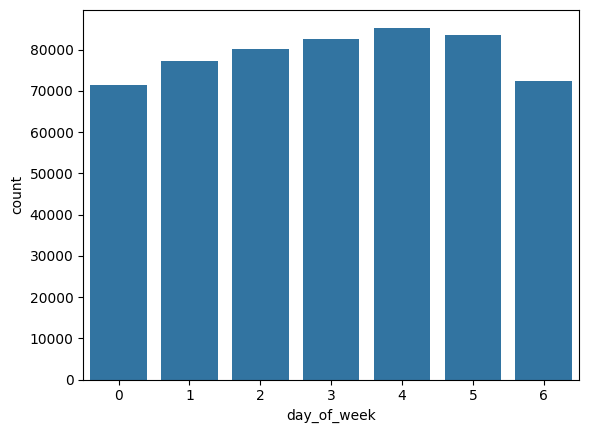

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='day_of_week', data=df)
plt.show()

<ipython-input-38-5927c2bf1f17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


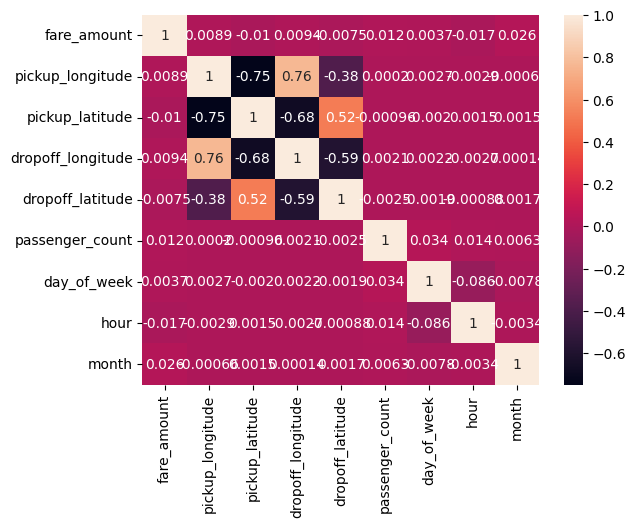

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


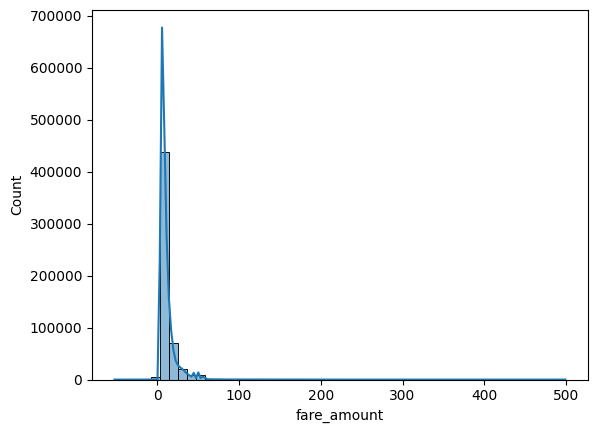

In [ ]:
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.show()


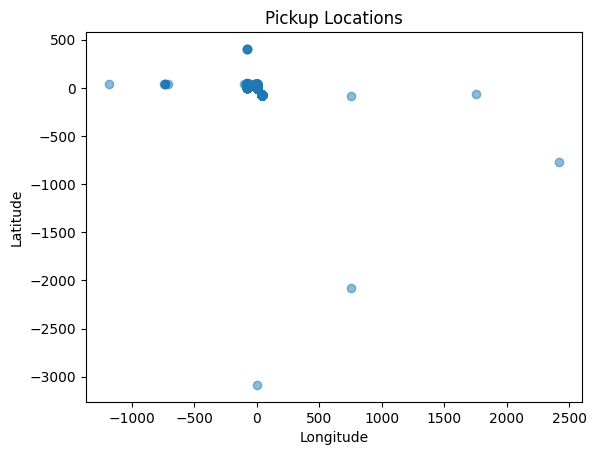

In [ ]:
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.5)
plt.title("Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


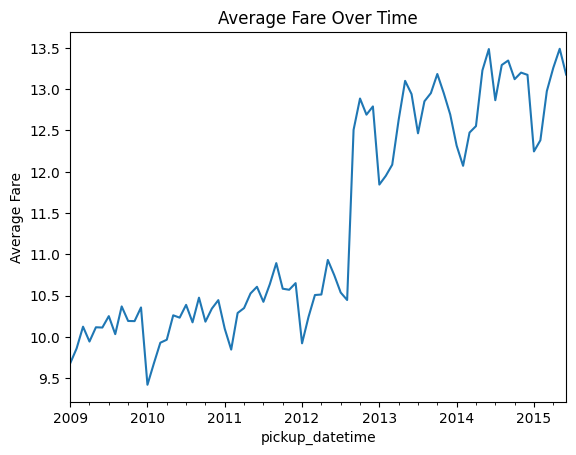

In [ ]:
df.set_index('pickup_datetime')['fare_amount'].resample('M').mean().plot()
plt.title("Average Fare Over Time")
plt.ylabel("Average Fare")
plt.show()



In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r


In [ ]:
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [ ]:
df.groupby('passenger_count')['distance_km'].mean()

passenger_count
0.0      59.839073
1.0      19.999778
2.0      20.575812
3.0      22.284064
4.0      22.901254
5.0      15.308673
6.0      26.547204
208.0     0.000000
Name: distance_km, dtype: float64

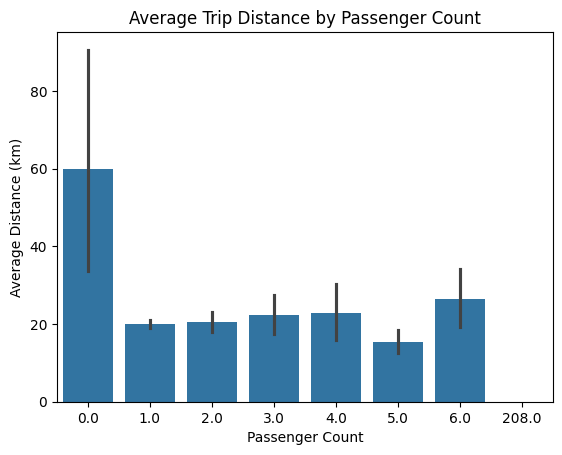

In [ ]:
sns.barplot(x='passenger_count', y='distance_km', data=df)
plt.title("Average Trip Distance by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Distance (km)")
plt.show()


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(val_df)

(441960, 110490)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour', 'month', 'distance_km'],
      dtype='object')

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [ ]:
target_col = 'fare_amount'

In [ ]:
train_inputs = train_df[input_cols]

In [ ]:
train_targets = train_df[target_col]

In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [ ]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
val_inputs
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [ ]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
### Baseline Model using Linear Regression, where we are using RMSE error

In [ ]:
import numpy as np

In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs, train_targets)
mean_model.mean

11.354714

In [ ]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [ ]:
val_preds = mean_model.predict(val_inputs)

In [ ]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [ ]:
train_rmse

9.789782

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.899954

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_model = LinearRegression()

In [ ]:
linear_reg_model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
train_preds = linear_reg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [ ]:
val_preds = linear_reg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [ ]:
train_rmse

9.78863266989743

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

In [ ]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [ ]:
add_dateparts(train_df, 'pickup_datetime')

In [ ]:
add_dateparts(val_df, 'pickup_datetime')

In [ ]:
add_dateparts(test_df, 'pickup_datetime')


In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,6,3,4,1.323925,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2,19,1,0.000207,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2,10,10,2.326757,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2,13,3,2.560386,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,6,15,2,1.243722,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,6,16,9,1.550965,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,6,9,4,7.120994,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,3,19,7,3.253576,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,3,18,2,2.147812,2011,2,17,3,18


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
def add_trip_distance(df):
    df['trip_distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [ ]:
%%time
add_trip_distance(train_df)

CPU times: user 9.45 s, sys: 328 ms, total: 9.78 s
Wall time: 9.89 s


In [ ]:
add_trip_distance(val_df)

In [ ]:
add_trip_distance(test_df)

In [ ]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
89913,23.799999,2012-09-25 23:10:00+00:00,-73.873009,40.774033,-73.940170,40.793907,2.0,1,23,9,6.071125,2012,9,25,1,23,6.071125
242141,12.000000,2014-08-03 18:45:00+00:00,-73.997498,40.721111,-73.990723,40.750317,1.0,6,18,8,3.297312,2014,8,3,6,18,3.297312
102605,5.500000,2015-01-30 00:07:28+00:00,-73.978088,40.758968,-73.970840,40.749027,1.0,4,0,1,1.262787,2015,1,30,4,0,1.262787
383926,5.000000,2015-06-30 16:33:20+00:00,-73.949387,40.772598,-73.955933,40.779579,1.0,1,16,6,0.952037,2015,6,30,1,16,0.952037
170484,4.100000,2009-10-13 12:16:19+00:00,-73.789780,40.643486,-73.873215,40.665980,2.0,1,12,10,7.469625,2009,10,13,1,12,7.469625


In [ ]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126
statue_liberty_lonlat = -74.0445, 40.6892
times_square_lonlat = -73.9855, 40.7580
central_park_lonlat = -73.968285, 40.785091
empire_state_building_lonlat = -73.985428, 40.748817
brooklyn_bridge_lonlat = -73.9969, 40.7061
moma_lonlat = -73.9776, 40.7614
rockefeller_center_lonlat = -73.9787, 40.7587
one_world_observatory_lonlat = -74.0139, 40.7130
broadway_theatre_district_lonlat = -73.9845, 40.7590
high_line_lonlat = -74.0048, 40.7480
madison_square_garden_lonlat = -73.9934, 40.7505
yankee_stadium_lonlat = -73.9262, 40.8296
citi_field_lonlat = -73.8458, 40.7571
barclays_center_lonlat = -73.9754, 40.6826
arthur_ashe_stadium_lonlat = -73.8452, 40.7505
metlife_stadium_lonlat = -74.0744, 40.8135
prudential_center_lonlat = -74.1711, 40.7335
red_bull_arena_lonlat = -74.1501, 40.7369
belmont_park_lonlat = -73.7275, 40.7062
usta_national_tennis_center_lonlat = -73.8475, 40.7503
katzs_delicatessen_lonlat = -73.9873, 40.7223
peter_luger_steak_house_lonlat = -73.9626, 40.7098
le_bernardin_lonlat = -73.9816, 40.7613
momofuku_noodle_bar_lonlat = -73.9845, 40.7295
the_spotted_pig_lonlat = -74.0064, 40.7359
per_se_lonlat = -73.9817, 40.7681
shake_shack_lonlat = -73.9777, 40.7415
joes_pizza_lonlat = -74.0022, 40.7305
sylvias_lonlat = -73.9455, 40.8081
nobu_lonlat = -74.0099, 40.7198
macy_herald_square_lonlat = -73.9896, 40.7505
bloomingdales_lonlat = -73.9668, 40.7616
tiffany_co_lonlat = -73.9747, 40.7625
fao_schwarz_lonlat = -73.9743, 40.7642
bh_photo_video_lonlat = -73.9969, 40.7535
saks_fifth_avenue_lonlat = -73.9763, 40.7584
strand_bookstore_lonlat = -73.9908, 40.7333
bergdorf_goodman_lonlat = -73.9742, 40.7631
apple_store_fifth_avenue_lonlat = -73.9721, 40.7639
nike_nyc_lonlat = -73.9753, 40.7495

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = df.apply(lambda row: haversine(lon, lat, row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [ ]:
%%time
for a_df in [train_df, val_df, test_df]:
    landmarks = [
        ('jfk', (-73.7781, 40.6413)),
        ('lga', (-73.8740, 40.7769)),
        ('ewr', (-74.1745, 40.6895)),
        ('met', (-73.9632, 40.7794)),
        ('wtc', (-74.0099, 40.7126)),
        ('statue_liberty', (-74.0445, 40.6892)),
        ('times_square', (-73.9855, 40.7580)),
        ('central_park', (-73.968285, 40.785091)),
        ('empire_state_building', (-73.985428, 40.748817)),
        ('brooklyn_bridge', (-73.9969, 40.7061)),
        ('moma', (-73.9776, 40.7614)),
        ('rockefeller_center', (-73.9787, 40.7587)),
        ('one_world_observatory', (-74.0139, 40.7130)),
        ('broadway_theatre_district', (-73.9845, 40.7590)),
        ('high_line', (-74.0048, 40.7480)),
        ('madison_square_garden', (-73.9934, 40.7505)),
        ('yankee_stadium', (-73.9262, 40.8296)),
        ('citi_field', (-73.8458, 40.7571)),
        ('barclays_center', (-73.9754, 40.6826)),
        ('arthur_ashe_stadium', (-73.8452, 40.7505)),
        ('metlife_stadium', (-74.0744, 40.8135)),
        ('prudential_center', (-74.1711, 40.7335)),
        ('red_bull_arena', (-74.1501, 40.7369)),
        ('belmont_park', (-73.7275, 40.7062)),
        ('usta_national_tennis_center', (-73.8475, 40.7503)),
        ('macy_herald_square', (-73.9896, 40.7505)),
        ('bloomingdales', (-73.9668, 40.7616)),
        ('tiffany_co', (-73.9747, 40.7625)),
        ('fao_schwarz', (-73.9743, 40.7642)),
        ('bh_photo_video', (-73.9969, 40.7535)),
        ('saks_fifth_avenue', (-73.9763, 40.7584)),
        ('strand_bookstore', (-73.9908, 40.7333)),
        ('bergdorf_goodman', (-73.9742, 40.7631)),
        ('apple_store_fifth_avenue', (-73.9721, 40.7639)),
        ('nike_nyc', (-73.9753, 40.7495)),
        ('katzs_delicatessen', (-73.9873, 40.7223)),
        ('peter_luger_steak_house', (-73.9626, 40.7098)),
        ('le_bernardin', (-73.9816, 40.7613)),
        ('momofuku_noodle_bar', (-73.9845, 40.7295)),
        ('the_spotted_pig', (-74.0064, 40.7359)),
        ('per_se', (-73.9817, 40.7681)),
        ('shake_shack', (-73.9777, 40.7415)),
        ('joes_pizza', (-74.0022, 40.7305)),
        ('sylvias', (-73.9455, 40.8081)),
        ('nobu', (-74.0099, 40.7198))
    ]

    for name, lonlat in landmarks:
        add_landmark_dropoff_distance(a_df, name, lonlat)


CPU times: user 6min 30s, sys: 22.9 s, total: 6min 53s
Wall time: 6min 59s


In [ ]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,...,katzs_delicatessen_drop_distance,peter_luger_steak_house_drop_distance,le_bernardin_drop_distance,momofuku_noodle_bar_drop_distance,the_spotted_pig_drop_distance,per_se_drop_distance,shake_shack_drop_distance,joes_pizza_drop_distance,sylvias_drop_distance,nobu_drop_distance
10012,8.1,2011-09-24 01:01:22+00:00,-73.986977,40.755867,-73.988564,40.731665,1.0,5,1,9,...,1.046770,3.270891,3.347069,0.418561,1.574914,4.092434,1.426093,1.156306,9.240533,2.230106
401407,4.9,2009-02-15 22:05:00+00:00,-74.004013,40.722530,-74.008957,40.710060,2.0,6,22,2,...,2.276823,3.907444,6.146206,2.986782,2.881345,6.850147,4.377161,2.343073,12.141242,1.085951
69214,6.5,2013-10-19 01:38:00+00:00,-73.991180,40.723263,-73.980476,40.730400,1.0,5,1,10,...,1.068577,2.741637,3.437227,0.353503,2.268292,4.193316,1.256235,1.830513,9.128127,2.745388
49748,12.5,2014-06-24 05:39:00+00:00,-73.968025,40.792267,-74.002617,40.741392,1.0,1,5,6,...,2.484454,4.869464,2.834527,2.019558,0.688858,3.453088,2.099237,1.211644,8.840405,2.478111
76485,4.5,2011-05-26 12:58:00+00:00,-73.955925,40.772167,-73.963623,40.761583,1.0,3,12,5,...,4.801976,5.758652,1.514398,3.977434,4.597915,1.686083,2.528424,4.744166,5.392816,6.065184


In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,...,katzs_delicatessen_drop_distance,peter_luger_steak_house_drop_distance,le_bernardin_drop_distance,momofuku_noodle_bar_drop_distance,the_spotted_pig_drop_distance,per_se_drop_distance,shake_shack_drop_distance,joes_pizza_drop_distance,sylvias_drop_distance,nobu_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,...,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,3.035813,13.506568,6.263920,19.764173,...,177.691940,178.930276,176.479775,177.183392,177.461223,176.764472,176.602043,177.509938,180.349920,178.490853
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.950033,6.517710,3.434881,371.532572,...,1229.220403,1228.723293,1229.455914,1229.283970,1229.514917,1229.439641,1229.328243,1229.442598,1228.658386,1229.356569
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.003733,0.017176,0.003118,0.003992,0.001048,0.006510,0.006607,0.006243,0.018188,0.005234
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,1.000000,9.000000,3.000000,1.213205,...,2.508282,4.240960,1.381904,2.129147,2.144247,1.683349,1.744539,2.109773,5.264163,3.042785
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,3.000000,14.000000,6.000000,2.117538,...,4.050005,5.475132,2.573036,3.387128,3.533210,2.741829,2.623055,3.732327,7.026621,4.945743
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,5.000000,19.000000,9.000000,3.882186,...,6.153211,7.120876,4.303868,5.458381,5.823194,4.770663,4.486290,5.995684,9.260644,7.189489
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,6.000000,23.000000,12.000000,16924.070987,...,15081.897219,15079.849891,15085.768253,15082.558766,15083.888301,15086.476420,15083.596444,15083.200608,15089.523137,15082.325044


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,...,katzs_delicatessen_drop_distance,peter_luger_steak_house_drop_distance,le_bernardin_drop_distance,momofuku_noodle_bar_drop_distance,the_spotted_pig_drop_distance,per_se_drop_distance,shake_shack_drop_distance,joes_pizza_drop_distance,sylvias_drop_distance,nobu_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,...,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,...,4.722952,5.995226,3.462182,4.208037,4.465399,3.740326,3.615559,4.524153,7.381415,5.510910
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,...,4.008531,3.607713,3.989913,3.946907,4.135650,4.013114,3.830606,4.150477,4.090378,4.231310
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,...,0.006431,0.015890,0.056238,0.051004,0.021814,0.027802,0.038699,0.005446,0.169644,0.015349
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,...,2.544959,4.244408,1.355893,2.153976,2.183340,1.665164,1.742334,2.169987,5.147299,3.071084
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,...,4.047529,5.442076,2.567056,3.392824,3.547532,2.698980,2.629228,3.743116,6.913448,4.950888
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,...,6.109028,7.015147,4.264200,5.409030,5.801812,4.687310,4.460224,5.961956,9.136746,7.118386
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,...,136.692554,136.561731,132.968613,135.912741,136.480119,132.380564,134.505023,136.735215,127.002567,138.072896


In [ ]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [ ]:
train_df = remove_outliers(train_df)

In [ ]:
val_df = remove_outliers(val_df)

In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
val_df.to_parquet('val.parquet')

In [ ]:
test_df.to_parquet('test.parquet')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
# Ridge Regression
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour', 'month', 'distance_km', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance',
       'statue_liberty_drop_distance', 'times_square_drop_distance',
       'central_park_drop_distance', 'empire_state_building_drop_distance',
       'brooklyn_bridge_drop_distance', 'moma_drop_distance',
       'rockefeller_center_drop_distance',
       'one_world_observatory_drop_distance',
       'broadway_theatre_district_drop_distance', 'high_line_drop_distance',
       'madison_square_garden_drop_distance', 'yankee_stadium_drop_distance',
       'citi_field_drop_distance', 'barclays_center_drop_distance',
       

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour', 'month', 'distance_km', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance',
       'statue_liberty_drop_distance', 'times_square_drop_distance',
       'central_park_drop_distance', 'empire_state_building_drop_distance',
       'brooklyn_bridge_drop_distance', 'moma_drop_distance',
       'rockefeller_center_drop_distance',
       'one_world_observatory_drop_distance',
       'broadway_theatre_district_drop_distance', 'high_line_drop_distance',
       'madison_square_garden_drop_distance', 'yankee_stadium_drop_distance',
       'citi_field_drop_distance', 'barclays_center_drop_distance',
       'arthur_ashe_stadium_drop_distance', 'metlife_stadium_drop_distance',
       'prudential_center_drop_distance', 'red_bull_arena_drop_distance',
       'belmont_park_drop_distance',
       'usta_national_tennis_center_drop_distance',
       'macy_herald_square_drop_distance', 'bloomingdales_drop_distance',
       'tiffany_co_drop_distance', 'fao_schwarz_drop_distance',
       'bh_photo_video_drop_distance', 'saks_fifth_avenue_drop_distance',
       'strand_bookstore_drop_distance', 'bergdorf_goodman_drop_distance',
       'apple_store_fifth_avenue_drop_distance', 'nike_nyc_drop_distance',
       'katzs_delicatessen_drop_distance',
       'peter_luger_steak_house_drop_distance', 'le_bernardin_drop_distance',
       'momofuku_noodle_bar_drop_distance', 'the_spotted_pig_drop_distance',
       'per_se_drop_distance', 'shake_shack_drop_distance',
       'joes_pizza_drop_distance', 'sylvias_drop_distance',
       'nobu_drop_distance']

In [ ]:
target_col = 'fare_amount'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
# Assuming 'pickup_datetime' is already converted to datetime in test_df
test_df['day_of_week'] = test_df['pickup_datetime'].dt.dayofweek
test_df['hour'] = test_df['pickup_datetime'].dt.hour
test_df['month'] = test_df['pickup_datetime'].dt.month

# Calculating the distance using haversine function
test_df['distance_km'] = test_df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [ ]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state=42, alpha=0.9)

In [ ]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 393 ms, sys: 295 ms, total: 689 ms
Wall time: 941 ms


Ridge(alpha=0.9, random_state=42)

In [ ]:
evaluate(model1)

(4.91009365295805,
 5.08395918379757,
 array([ 8.11044046,  4.23977239,  9.20861344, ..., 11.09452724,
         8.55148603, 10.24377061]),
 array([10.82772624,  6.78459857, 48.31128639, ...,  7.70164899,
        29.1282402 ,  8.80768688]))

In [ ]:
predict_and_submit(model1, 'ridge_submission.csv')


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.106551
1,2015-01-27 13:08:24.0000003,10.600774
2,2011-10-08 11:53:44.0000002,5.579248
3,2012-12-01 21:12:12.0000002,9.088605
4,2012-12-01 21:12:12.0000003,14.581434
...,...,...
9909,2015-05-10 12:37:51.0000002,8.896928
9910,2015-01-12 17:05:51.0000001,11.479194
9911,2015-04-19 20:44:15.0000001,49.970285
9912,2015-01-31 01:05:19.0000005,20.481995


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [ ]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 33min 45s, sys: 3.48 s, total: 33min 48s
Wall time: 19min 56s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model2)

(3.548624206298838,
 4.138959523698438,
 array([ 6.97769088,  9.22443388,  8.90484532, ..., 10.39930222,
         7.77892363, 10.13701918]),
 array([12.33715721,  6.29552272, 47.3681236 , ...,  8.41172001,
        29.2493729 ,  7.97346175]))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
# Gradient Boosting
from xgboost import XGBRegressor

In [ ]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 25.9 s, sys: 336 ms, total: 26.2 s
Wall time: 15.2 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(model3)

(3.0926952,
 3.9855006,
 array([ 6.9635425,  8.626669 ,  9.693859 , ..., 12.340491 ,  9.319477 ,
        10.006147 ], dtype=float32),
 array([14.394588 ,  5.9261947, 47.900455 , ...,  8.323354 , 30.731562 ,
         8.287691 ], dtype=float32))

In [ ]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.477621
1,2015-01-27 13:08:24.0000003,11.127668
2,2011-10-08 11:53:44.0000002,4.660153
3,2012-12-01 21:12:12.0000002,9.338923
4,2012-12-01 21:12:12.0000003,16.927891
...,...,...
9909,2015-05-10 12:37:51.0000002,9.212264
9910,2015-01-12 17:05:51.0000001,12.070803
9911,2015-04-19 20:44:15.0000001,52.694504
9912,2015-01-31 01:05:19.0000005,20.412937


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
# Gradient Boosting

In [ ]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

CPU times: user 3min, sys: 605 ms, total: 3min 1s
Wall time: 1min 44s


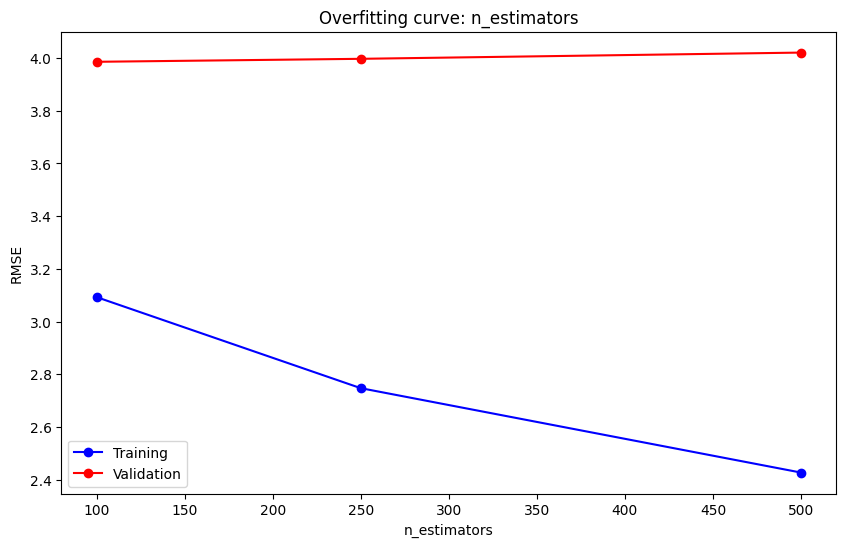

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [ ]:
best_params['n_estimators'] = 100

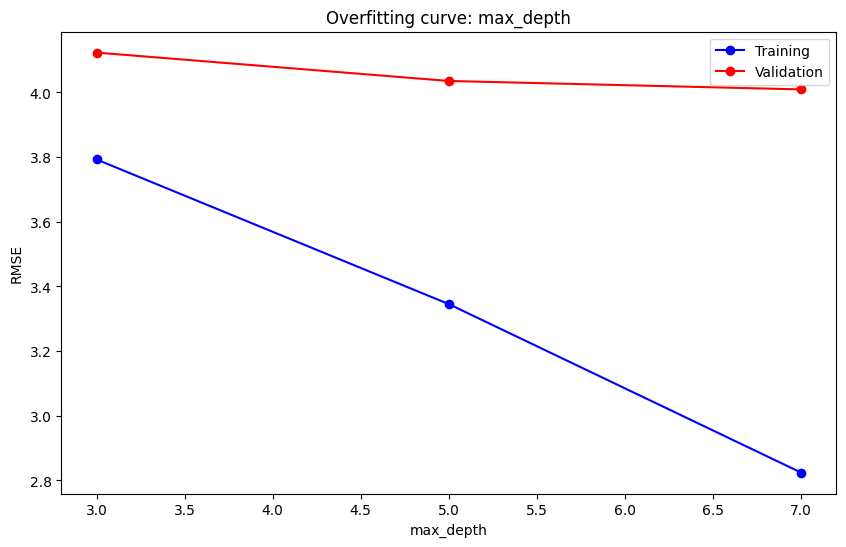

In [ ]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [ ]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.2], **best_params)